In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Fathest Point Sampling

### Example

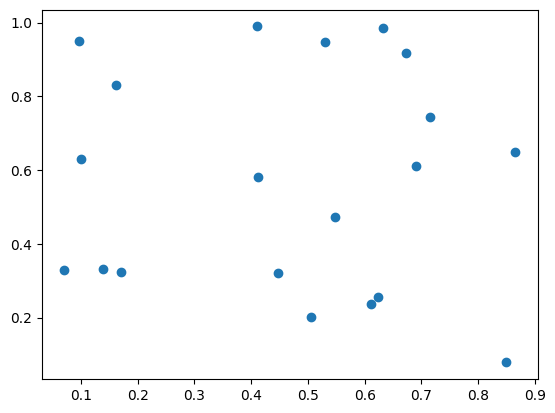

In [127]:
n_points = 20
test_data = np.random.random([n_points, 2])

plt.scatter(test_data[:, 0], test_data[:, 1])
plt.show()

In [138]:
n_sample = 10

point_ids = np.arange(n_points)
first_point_id = np.random.randint(0, n_points)
centroid = np.zeros([n_sample], dtype='int')

centroid[0] = first_point_id

for i in range(n_sample-1):
    last_added_id = centroid[i]
    point_ids = point_ids[np.where(point_ids != last_added_id)[0]]
    last_added_point = test_data[last_added_id]
    remain_points = test_data[point_ids]
    distance = np.linalg.norm(remain_points - last_added_point, axis=1)
    fathest_idx = np.argmax(distance)

    centroid[i+1] = point_ids[fathest_idx]

print(centroid)

[17  7  4 19  1 13  5 15 10  0]


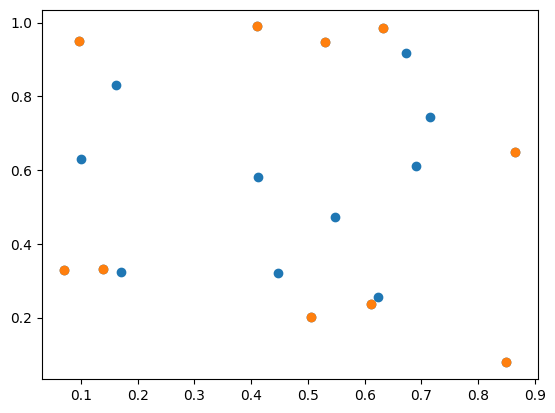

In [139]:
plt.scatter(test_data[:, 0], test_data[:, 1])
plt.scatter(test_data[centroid, 0], test_data[centroid, 1])
plt.show()

### Pytorch implementation

In [76]:
def farthest_point_sample(xyz, npoint):
    """
    Input:
        xyz: pointcloud data, [B, N, 3]
        npoint: number of samples
    Return:
        centroids: sampled pointcloud index, [B, npoint]
    """
    device = xyz.device
    B, N, C = xyz.shape
    centroids = torch.zeros(B, npoint, dtype=torch.long).to(device)
    distance = torch.ones(B, N).to(device) * 1e10
    farthest = torch.randint(0, N, (B,), dtype=torch.long).to(device)
    batch_indices = torch.arange(B, dtype=torch.long).to(device)
    for i in range(npoint):
        centroids[:, i] = farthest
        centroid = xyz[batch_indices, farthest, :].view(B, 1, 3)
        dist = torch.sum((xyz - centroid) ** 2, -1)
        mask = dist < distance
        distance[mask] = dist[mask]
        farthest = torch.max(distance, -1)[1]
    return centroids